In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("11.22.csv", index_col = 0)
pd.set_option("display.max_columns", 40)

In [3]:
data = data[data['result'] != 'UNKNOWN']

In [13]:
# 선택한 라인으로 걸린 포지션에 따른 결과를 도출하기 위해, lane, position, result로 grouping을 해서 그 size를 lanedata에 저장하였다.
lanedata = data.groupby(['lane', 'position', 'result'], as_index = False).size()

In [32]:
data.groupby(['lane', 'role', 'position']).size()

lane    role     position
BOTTOM  CARRY    A           2906
                 S              1
        DUO      A             38
                 M              9
                 S             22
                 T              7
        SOLO     A            194
                 J              1
                 M              1
                 S            139
                 T              1
        SUPPORT  A              3
                 J              5
                 M              3
                 S           2925
                 T              2
JUNGLE  NONE     A             42
                 J           3368
                 M             44
                 S             69
                 T            274
MIDDLE  CARRY    A             13
                 M            109
                 T              3
        DUO      A            141
                 J              2
                 M            307
                 S              2
                 T    

In [6]:
lanelist = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'NONE']
positionlist = ['T', 'J', 'M', 'A', 'S']
d = data.value_counts(['lane', 'position', 'result'], sort = False)

lst = []
for lane in lanelist:
    for position in positionlist:
        win = d[lane, position]['WIN']
        lose = d[lane, position]['LOSE']
        lst.append({'lane' : lane, 'position' : position, 'winrate' : win/(win+lose)})

lst = pd.DataFrame(lst)

In [7]:
lst

,lane,position,winrate
0,TOP,T,0.493640
1,TOP,J,0.526316
2,TOP,M,0.558621
3,TOP,A,0.560976
4,TOP,S,0.628571
5,JUNGLE,T,0.547445
6,JUNGLE,J,0.499703
7,JUNGLE,M,0.636364
8,JUNGLE,A,0.452381
9,JUNGLE,S,0.463768


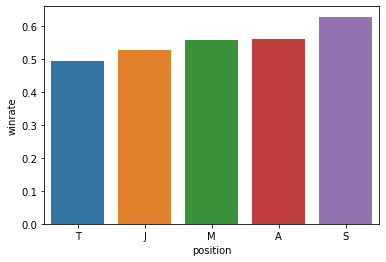

In [8]:
plt.subplot(111)
bar_width = 0.35
lanelist = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'NONE']
for l in lanelist:
    sns.barplot(data = lst[lst['lane'] == 'TOP'], x = 'position', y = 'winrate')
# plt.axhline(0.5, ls = '--', lw = 3, color = 'pink')
# plt.title(z, weight = 'bold')

In [9]:
data[data['lane'] == 'NONE']

,gameId,createDate,teamId,summonerId,isUnknownSummoner,participantId,championId,result,skinIndex,spell1,spell2,leaver,experienceEarned,eligibleFirstWinOfDay,ipEarned,boostXpEarned,boostIpEarned,premadeSize,item0,item1,...,visionScore,timeCCingOthers,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,role,keystoneMasteryId,tierRank,position,isDetail,isRanked,perk0,perkPrimaryStyle,perkSubStyle,opScore,opScoreRank,isOPScoreMaxInTeam,gameLength,version
30,5543730045,2021-11-03 08:53:44,200,3325602,0,6,223,WIN,0,4,12,0,0,0,0,0,0,0,1054,3748,...,8,22,8588,4915,3940,NONE,SUPPORT,0,G442,T,1,1,8437,8400,8000,6.49,2,0,963,11.22.406.3587
31,5543730045,2021-11-03 08:53:44,200,5692662,0,8,7,WIN,0,4,14,0,0,0,0,0,0,0,2033,6655,...,8,12,2426,197,197,NONE,SUPPORT,0,S156,M,1,1,8112,8100,8300,6.14,4,0,963,11.22.406.3587
32,5543730045,2021-11-03 08:53:44,200,10415415,0,7,141,WIN,0,4,11,0,0,0,0,0,0,0,6630,2031,...,18,6,6017,13637,0,NONE,SUPPORT,0,G470,J,1,1,8010,8000,8300,7.08,1,1,963,11.22.406.3587
33,5543730045,2021-11-03 08:53:44,100,13041831,0,4,81,LOSE,0,7,4,0,0,0,0,0,0,0,6632,3158,...,2,0,3925,916,916,NONE,SUPPORT,0,G40,A,1,1,8010,8000,8200,5.05,8,0,963,11.22.406.3587
34,5543730045,2021-11-03 08:53:44,100,13534889,0,1,54,LOSE,0,12,4,0,0,0,0,0,0,0,2033,6662,...,6,11,7447,0,0,NONE,SUPPORT,0,G40,T,1,1,8229,8200,8300,4.39,10,0,963,11.22.406.3587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19785,5543761786,2021-11-03 10:07:19,200,86494832,0,8,157,LOSE,0,14,4,0,0,0,0,0,0,0,1055,2031,...,7,10,6895,693,693,NONE,SUPPORT,0,B111,M,1,1,8010,8000,8400,5.34,8,0,1024,11.22.406.3587
19786,5543761786,2021-11-03 10:07:19,100,86613636,0,5,12,WIN,0,4,3,0,0,0,0,0,0,0,3859,3190,...,14,36,10069,560,184,NONE,SUPPORT,0,B289,S,1,1,8230,8200,8300,6.18,4,0,1024,11.22.406.3587
19787,5543761786,2021-11-03 10:07:19,100,87153672,0,1,86,WIN,0,14,4,0,0,0,0,0,0,0,6631,2031,...,6,19,7625,13051,7820,NONE,SUPPORT,0,B367,T,1,1,8010,8000,8400,7.13,3,0,1024,11.22.406.3587
19788,5543761786,2021-11-03 10:07:19,200,88221014,0,10,53,LOSE,0,3,4,0,0,0,0,0,0,0,3858,3117,...,6,34,9344,0,0,NONE,SUPPORT,0,B412,S,1,1,8465,8400,8300,4.70,10,0,1024,11.22.406.3587


In [10]:
pd.set_option("max_rows", 500)